In [1]:
import pandas as pd
import numpy as np

data = pd.read_csv('../../data/understanding_cloud_organization/sample_submission.csv')
data.head()

C:\Users\rbarr\Miniconda3\lib\distutils\__init__.py:14: UserWarning: The virtualenv distutils package at %s appears to be in the same location as the system distutils?
  "The virtualenv distutils package at %s appears to be in the same location as the system distutils?")


,Image_Label,EncodedPixels
0,002f507.jpg_Fish,1 1
1,002f507.jpg_Flower,1 1
2,002f507.jpg_Gravel,1 1
3,002f507.jpg_Sugar,1 1
4,0035ae9.jpg_Fish,1 1


In [1]:
# read image files

import pathlib
import numpy as np
from skimage.io import imread, imshow
from skimage.color import rgb2gray

training_images = [i for i in pathlib.Path('../../data/understanding_cloud_organization/train_images').glob('*.jpg')]
im = imread(str(training_images[1]))
im_gray = rgb2gray(im)

C:\Users\rbarr\Miniconda3\lib\distutils\__init__.py:14: UserWarning: The virtualenv distutils package at %s appears to be in the same location as the system distutils?
  "The virtualenv distutils package at %s appears to be in the same location as the system distutils?")


In [2]:
# compare shapes

print(f'original shape = {im.shape}')
print(f'grayscale shape = {im_gray.shape}')

original shape = (1400, 2100, 3)
grayscale shape = (1400, 2100)


In [5]:
# compare images

import matplotlib.pyplot as plt

plt.figure(figsize = (10, 4))

plt.subplot(1, 2, 1)
plt.imshow(im)
plt.axis('off')
plt.title('original')

plt.subplot(1, 2, 2)
plt.imshow(im_gray, cmap = 'gray')
plt.axis('off')
plt.title('grayscale')

plt.tight_layout()
plt.show()

<Figure size 1000x400 with 2 Axes>

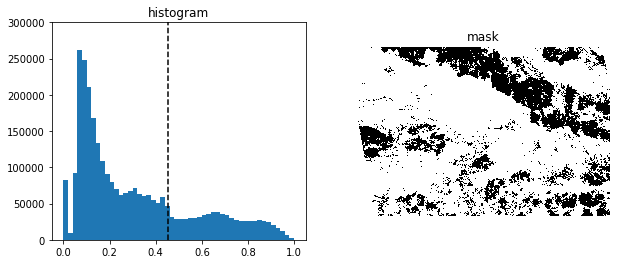

In [6]:
# test image foreground 

from skimage.filters import threshold_yen

thresh_val = threshold_yen(im_gray)
mask = np.where(im_gray > thresh_val, 1, 0)

if np.sum(mask == 0) < np.sum(mask == 1):
    mask = np.where(mask, 0, 1)
    
plt.figure(figsize = (10, 4))

plt.subplot(1, 2, 1)
im_pixels = im_gray.flatten()
plt.hist(im_pixels, bins = 50)
plt.vlines(thresh_val, 0, 300000, linestyle = '--')
plt.ylim([0, 300000])
plt.title('histogram')

plt.subplot(1, 2, 2)
mask_for_display = np.where(mask, mask, np.nan)
plt.imshow(mask_for_display, cmap = 'gray')
plt.axis('off')
plt.title('mask')

plt.show()

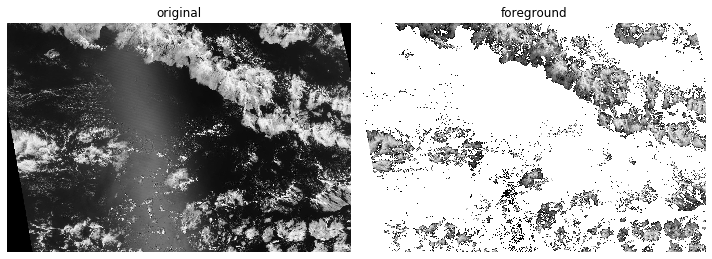

In [7]:
# compare images

im_fore = np.where(mask, im_gray, np.nan)

plt.figure(figsize = (10, 4))

plt.subplot(1, 2, 1)
plt.imshow(im_gray, cmap = 'gray')
plt.axis('off')
plt.title('original')

plt.subplot(1, 2, 2)
plt.imshow(im_fore, cmap = 'gray')
plt.axis('off')
plt.title('foreground')

plt.tight_layout()
plt.show()

In [2]:
data = pd.read_csv('../../data/understanding_cloud_organization/train.csv').fillna('0 0')
data.head(20)

,Image_Label,EncodedPixels
0,0011165.jpg_Fish,264918 937 266318 937 267718 937 269118 937 27...
1,0011165.jpg_Flower,1355565 1002 1356965 1002 1358365 1002 1359765...
2,0011165.jpg_Gravel,0 0
3,0011165.jpg_Sugar,0 0
4,002be4f.jpg_Fish,233813 878 235213 878 236613 878 238010 881 23...
5,002be4f.jpg_Flower,1339279 519 1340679 519 1342079 519 1343479 51...
6,002be4f.jpg_Gravel,0 0
7,002be4f.jpg_Sugar,67495 350 68895 350 70295 350 71695 350 73095 ...
8,0031ae9.jpg_Fish,3510 690 4910 690 6310 690 7710 690 9110 690 1...
9,0031ae9.jpg_Flower,2047 703 3447 703 4847 703 6247 703 7647 703 9...


In [44]:
data[['Image', 'Label']] = data['Image_Label'].str.split('_', expand = True)
data.head()

,Image_Label,EncodedPixels,Image,Label
0,0011165.jpg_Fish,264918 937 266318 937 267718 937 269118 937 27...,0011165.jpg,Fish
1,0011165.jpg_Flower,1355565 1002 1356965 1002 1358365 1002 1359765...,0011165.jpg,Flower
2,0011165.jpg_Gravel,0 0,0011165.jpg,Gravel
3,0011165.jpg_Sugar,0 0,0011165.jpg,Sugar
4,002be4f.jpg_Fish,233813 878 235213 878 236613 878 238010 881 23...,002be4f.jpg,Fish


In [3]:
def PixelsFunc(x):
    '''
    x: run-length encoded pixels
    '''
    rle_split = x.split() # split rle string by space delimiter
    starts = list(map(int, rle_split[::2]))
    runs = list(map(int, rle_split[1::2])) # get pixel start and run values
    pixels = []
    for i in range(len(starts)):
        pixels += (list(range(starts[i], starts[i] + runs[i])))
    return pixels

In [4]:
pixels00200 = data['EncodedPixels'][:200].apply(PixelsFunc)

In [ ]:
data['Pixels'] = data['EncodedPixels'].apply(PixelsFunc)